# Model 012 basicThHy

Charlie Shobe


This model has ErosionDeposition river erosion (with a threshold) and linear diffusion of the forms:
$$\frac{d\eta}{dt}=-(KA^mS^n-\omega_c)-\frac{VQ_s}{Q}$$
and
$$\frac{d\eta}{dt} = -D\nabla^2\eta$$

So, at steady state, the landscape will obey:
$$S=\left(\frac{UV+\omega_c}{K_sA^mr}+\frac{U+\omega_c}{K_sA^m}\right)^{1/n}$$
when only the fluvial rule is in place ($D=0$). 

In [1]:
from terrainbento import BasicThHy
import numpy as np
import matplotlib.pyplot as plt
from landlab import imshow_grid

//anaconda/lib/python2.7/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [2]:
#parameter dictionary (diffusivity will be 0, K_sp is nonzero)
params = { 'number_of_node_rows' : 100,
          'number_of_node_columns' : 160,
          'node_spacing' : 10.0,
          'east_boundary_closed' : False,
          'north_boundary_closed' : False,
          'west_boundary_closed' : False,
          'south_boundary_closed' : False,
          'dt' : 10.0,
          'K_sp' : 0.001,
          'erosion__threshold' : 0.001,
          'm_sp' : 0.5,
          'n_sp' : 1.0,
          'v_sc' : 1.0,
          'phi' : 0.0,
          'F_f' : 0.0,
          'linear_diffusivity' : 10e-20,
          'outlet_lowering_rate' : 0.0005,
          'method' : 'simple_stream_power',
          'solver' : 'basic',
          'output_filename': 'model_000_output'
}

In [3]:
#instantiate and establish topo error tolerance
hy = BasicThHy(params=params)
tolerance = 0.0001

In [4]:
#time loop
dt = 10
elapsed_time = 0 #years
keep_running = True
while keep_running == True:
    pre_topo = hy.grid.at_node['topographic__elevation'][hy.grid.core_nodes]
    hy.run_one_step(dt)
    #    ld.run_one_step(dt = dt)
    #basic.grid.at_node['topographic__elevation'][basic.grid.boundary_nodes] -= uplift_rate * dt
    post_topo = hy.grid.at_node['topographic__elevation'][hy.grid.core_nodes]
    if elapsed_time % 100 == 0:
        print(elapsed_time)
        print(max(abs(pre_topo - post_topo)))
    elapsed_time += dt
    if max(abs(pre_topo - post_topo)) <= tolerance: #1mm
        keep_running = False

0
0.173403004978
100
0.0679368515295
200
0.068423921154
300
0.0369775162453
400
0.0266201022906
500
0.0263402743708
600
0.0219555908516
700
0.0343811926832
800
0.0087415668017
900
0.00564206781875
1000
0.00561604148415
1100
0.00636489827567
1200
0.011269414725
1300
0.0151280957786
1400
0.0055254202547
1500
0.0068870993687
1600
0.012231796291
1700
0.0084048307646
1800
0.00649799880385
1900
0.0154716365699
2000
0.0168098066808
2100
0.00968684282735
2200
0.00772705198563
2300
0.0123926523812
2400
0.0113775942499
2500
0.0126426936913
2600
0.0220169009689
2700
0.0170787058838
2800
0.0132090673205
2900
0.0102166192335
3000
0.00791591334854
3100
0.0113402024667
3200
0.0143238661059
3300
0.00987333849919
3400
0.00943131715268
3500
0.00860542956209
3600
0.0547282273916
3700
0.0313859269874
3800
0.0423557518434
3900
0.0319701501433
4000
0.021836581301
4100
0.0198835543743
4200
0.0171367142752
4300
0.0147156652786
4400
0.0124055688496
4500
0.0538254284253
4600
0.0727637557506
4700
0.0914335435211

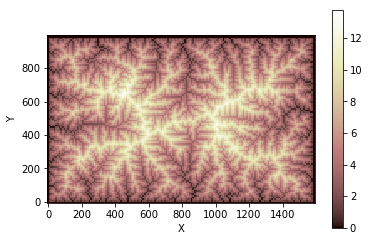

In [5]:
%matplotlib inline
imshow_grid(hy.grid, 'topographic__elevation')

0.00483183173768


(0.0001, 0.05)

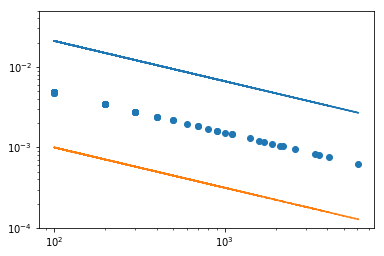

In [13]:
print(hy.grid.at_node['topographic__steepest_slope'][235])
#for some reason, the line of nodes adjacent to all the boundaries
plt.scatter(hy.grid.at_node['drainage_area'][(hy.grid.node_x > 10)&(hy.grid.node_x < 158)&(hy.grid.node_y >10)&(hy.grid.node_y<98)], hy.grid.at_node['topographic__steepest_slope'][(hy.grid.node_x > 10)&(hy.grid.node_x < 158)&(hy.grid.node_y >10)&(hy.grid.node_y<98)])

#first plot the line for SPACE with a constant threshold NOT SMOOTHED
plt.plot(hy.grid.at_node['drainage_area'][(hy.grid.node_x > 10)&(hy.grid.node_x < 158)&(hy.grid.node_y >10)&(hy.grid.node_y<98)], ( 2 * (0.00005+0.001) / 0.01)*np.power(hy.grid.at_node['drainage_area'][(hy.grid.node_x > 10)&(hy.grid.node_x < 158)&(hy.grid.node_y >10)&(hy.grid.node_y<98)], -0.5))

#then plot the line for SPACE with no threshold-- data should fall between the two
plt.plot(hy.grid.at_node['drainage_area'][(hy.grid.node_x > 10)&(hy.grid.node_x < 158)&(hy.grid.node_y >10)&(hy.grid.node_y<98)], ( 2 * (0.00005) / 0.01)*np.power(hy.grid.at_node['drainage_area'][(hy.grid.node_x > 10)&(hy.grid.node_x < 158)&(hy.grid.node_y >10)&(hy.grid.node_y<98)], -0.5), linestyle = '--')


plt.xscale('log')
plt.yscale('log')
plt.ylim(0.0001, 0.05)

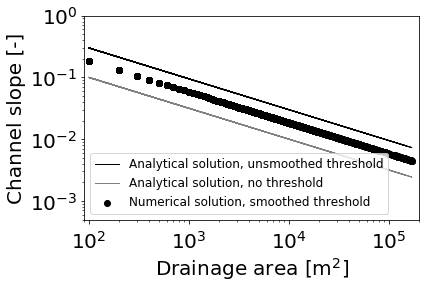

In [13]:
###MAKE SLOPE-AREA PLOT

import matplotlib

#assign area_array and slope_array
area_array = hy.grid.at_node['drainage_area'][(hy.grid.node_x > 10)&(hy.grid.node_x < 1580)&(hy.grid.node_y >10)&(hy.grid.node_y<980)]
slope_array = hy.grid.at_node['topographic__steepest_slope'][(hy.grid.node_x > 10)&(hy.grid.node_x < 1580)&(hy.grid.node_y >10)&(hy.grid.node_y<980)]

##instantiate figure and plot
fig = plt.figure(figsize=(6, 3.75))
slope_area = plt.subplot()

#plotting param
matplotlib.rcParams.update({'font.size': 20})

#create an array for the detachment-limited analytical solution
u = 0.0005 #m/yr, uplift or baselevel lowering rate
k = 0.001 #fluvial erodibility
m = 0.5 #discharge exponent
n = 1.0 #slope exponent
v = 1 #settling velocity
threshold = 0.001 #threshold

#calculate analytical slope from area field
analytical_slope_array =  np.power(((u * v) / k) + (u / k), 1 / n) * np.power(area_array, -m/n)
analytical_slope_array_thresh = np.power(((u * v + threshold) / k) + ((u + threshold) / k), 1 / n) * np.power(area_array, -m/n)

#plot threshold analytical solution
slope_area.plot(area_array, analytical_slope_array_thresh, linestyle='-',
                color='k', linewidth = 1, label = 'Analytical solution, unsmoothed threshold')

#plot the analytical solution
slope_area.plot(area_array, analytical_slope_array, linestyle='-',
                color='grey', linewidth = 1, label = 'Analytical solution, no threshold')

#plot the data
slope_area.scatter(area_array, slope_array, marker='o', c='k', 
                   label = 'Numerical solution, smoothed threshold') #plot HA data
                   
#make axes log and set limits
slope_area.set_xscale('log')
slope_area.set_yscale('log')

slope_area.set_xlim(9*10**1, 2*10**5)
slope_area.set_ylim(5e-4, 1e0)

#set x and y labels
slope_area.set_xlabel(r'Drainage area [m$^2$]')
slope_area.set_ylabel('Channel slope [-]')
slope_area.legend(scatterpoints=1,prop={'size':12})
slope_area.tick_params(axis='x', which='major', pad=7)

fig.savefig('threshold_hybrid_slope_area.eps',bbox_inches='tight', dpi=1000) #save figure

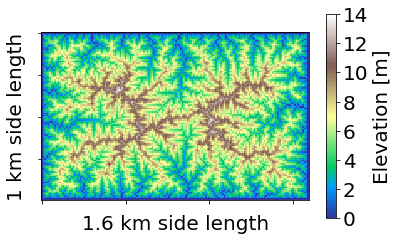

In [7]:
##MAKE TOPO FIGURE
#define 'topo'
topo = hy.grid.at_node['topographic__elevation']
#plotting param
matplotlib.rcParams.update({'font.size': 20})

# #instantiate figure and plot
topo_fig = plt.figure(figsize=(6, 3.75))
t1 = plt.subplot()
topo = topo.reshape(100,160)
ts1_plot = t1.imshow(topo[::-1], cmap='terrain', vmin = 0, vmax = 14)

#add colorbar
cb = plt.colorbar(ts1_plot, label = 'Elevation [m]')

#axis labels
t1.tick_params(labelbottom='off', labelleft='off') 
t1.set_ylabel('1 km side length', labelpad = 15)
t1.set_xlabel('1.6 km side length', labelpad = 15)

#save figure
topo_fig.savefig('threshold_hybrid_topo.eps',bbox_inches='tight', dpi=300)